# Final Project Part 3.1
## group members (Group 26): Powell Hung, Dhruvi Bhagat, Shao-Ren Chen, Sheny Lin

In [1]:
import pandas as pd
import bqplot
import numpy as np
import ipywidgets
import matplotlib.pyplot as plt
import altair as alt

In [2]:
df = pd.read_csv('http://data.insideairbnb.com/united-states/nj/newark/2022-09-28/visualisations/listings.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,39422329,"Bleu Chic - Easy access to NYC, EWR & Newark Penn",108374913,Perry,NaN,West,40.73856,-74.21735,Entire home/apt,150,1,117,2022-09-22,3.27,2,270,33,NaN
1,654189021128024082,COCO CHANEL GETAWAY,429107274,Lux By Us,NaN,West,40.76014,-74.20716,Entire home/apt,83,1,9,2022-09-24,2.81,2,344,9,NaN
2,53485208,Comfy Studio Apt. Near Downtown Newark!,419402023,Deyshawn,NaN,West,40.76124,-74.20209,Entire home/apt,116,1,6,2022-08-19,0.59,2,210,6,NaN
3,560261233458217010,Lovely 1-Bedroom rental unit with free parking,438981094,John,NaN,South,40.73140,-74.22270,Entire home/apt,89,2,9,2022-09-04,1.19,2,241,9,NaN
4,653803742549008649,Cute hideout one bedroom in the heart of Ampere,168551348,Hashim,NaN,North,40.76547,-74.19711,Entire home/apt,84,1,5,2022-08-17,2.38,1,353,5,NaN


# Interactive Visualization

## Title: The secret behind the relationship between neighborhood and price in Newark, NJ by Dhruvi Bhagat, Powell Hung, Shao-Ren Chen, Sheny Lin

In [3]:
brush = alt.selection_interval(encodings=['x','y'])

In [4]:
rect = alt.Chart.from_dict({
  "data":{"url":"https://raw.githubusercontent.com/shenylin/shenylin.github.io/main/Airbnb_Newark_listings.csv"},
  "mark":"rect",
  "height":400,
  "width":400,
  "encoding":{
      "x":{"bin":True,"field":"price","type":"quantitative","title": "Price"},
      "y":{"field":"neighbourhood", "type":"nominal",'title': 'Neighborhood'},
      "color":{"aggregate":"count", "type":"quantitative"} 
      
  }
}).add_selection(
    brush
)
rect

alt.Chart(...)

In [5]:
hist = alt.Chart.from_dict({
    'data': {'url':'https://raw.githubusercontent.com/shenylin/shenylin.github.io/main/Airbnb_Newark_listings.csv'},
            'height': 400,
            'width': 400,
            'title': 'Average Number of Reviews by Room Type in Newark',
            'layer': [{'mark': {'type':'bar','tooltip': True,'color': 'blue'},
                      'encoding': {'x': {'field': 'room_type', 'type': 'nominal', 'title': 'Room Type'},
                'y':{'aggregate': 'average', 'field': 'number_of_reviews', "type": 'quantitative', 'title': 'Average Number of Reviews'}}}]
}).transform_filter(
    brush
)

In [6]:
dashboard = rect | hist

In [7]:
dashboard

alt.HConcatChart(...)

In [28]:
plt.savefig('/Users/chenghsuanlin/online_cv_public/assets/pngs/InteractiveViz.png')

<Figure size 640x480 with 0 Axes>

# Write-up - 1st paragraph

The dashboard was created to facilitate the understanding of the relationship between "Neighborhood (in Newark, NJ)" and "Price (per night)" as well as "Room Type" and "Average Number of Review" of the Airbnb listings in Newark, NJ. This visualization is a dashboard with a heatmap on the left and a bar plot on the right.

As for design choices, "Price per night" is a quantitative value, "Neighborhood" is a discrete unordered category, and the "Room Type" is a discrete unordered category which makes it nominal as well . 

We ensure the encoding of “price“ to be quantitative in order to make it work well with Altair. The color choices in this visualization is by default and if you make a selection on the heatmap, the bar plot will reflect the values accordingly. Therefore, we can see the relationship among the "Neighborhoods (in Newark, NJ)", "Price (per night)", "Room Type" and "Average Number of Review" of the Airbnb listings in Newark, NJ.

In [8]:
myJekyllDir = '/Users/chenghsuanlin/online_cv_public/assets/json/'

In [9]:
dashboard.save(myJekyllDir+'interactiveViz.json')

# Contextual Visualization

### Source

Inside Airbnb: http://insideairbnb.com/get-the-data

neighbourhoods.geojson (28.2 KB): https://raw.githubusercontent.com/shenylin/shenylin.github.io/main/neighbourhoods.geojson

reviews.csv (12 MB): https://raw.githubusercontent.com/shenylin/shenylin.github.io/main/reviews.csv

The below visualizations are created by us using data from above sources.


In [10]:
import geopandas 
import ipyleaflet
import numpy as np
import contextily as ctx

In [11]:
gdf = geopandas.read_file('https://raw.githubusercontent.com/shenylin/shenylin.github.io/main/neighbourhoods.geojson')

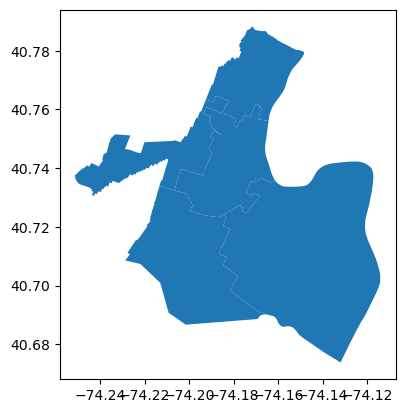

In [12]:
gdf.plot()

In [13]:
gdf.head()

,neighbourhood,neighbourhood_group,geometry
0,Central,None,"MULTIPOLYGON (((-74.20661 40.73241, -74.20382 ..."
1,South,None,"MULTIPOLYGON (((-74.22880 40.70855, -74.22670 ..."
2,West,None,"MULTIPOLYGON (((-74.25141 40.73750, -74.25128 ..."
3,North,None,"MULTIPOLYGON (((-74.19248 40.76342, -74.19012 ..."
4,East,None,"MULTIPOLYGON (((-74.18670 40.71082, -74.18568 ..."


In [14]:
gdf['neighbourhood'].unique()

array(['Central', 'South', 'West', 'North', 'East'], dtype=object)

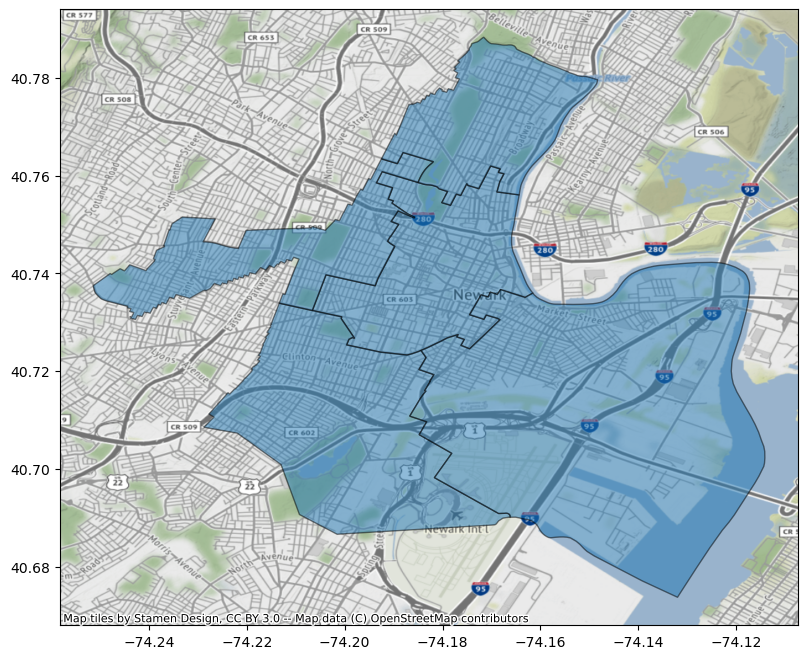

In [15]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

gdf.plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax, crs=gdf.crs)

plt.show()

## Contextual Visualization 1

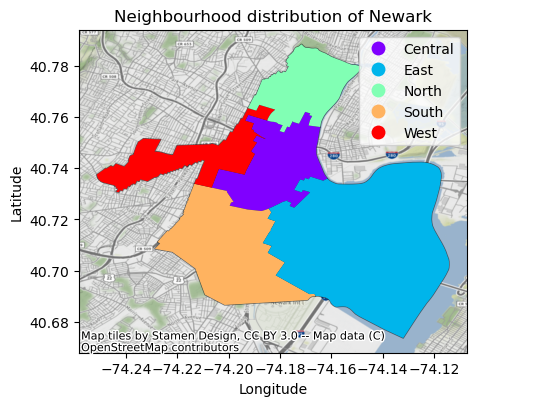

In [22]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

gdf.plot(ax=ax, alpha=0.5, edgecolor='k')
gdf.plot(column='neighbourhood', ax=ax, cmap='rainbow', categorical=True, legend=True)

ctx.add_basemap(ax=ax, crs=gdf.crs.to_string())

plt.title("Neighbourhood distribution of Newark")

plt.xlabel('Longitude') 
plt.ylabel('Latitude') 

plt.savefig('/Users/chenghsuanlin/online_cv_public/assets/pngs/ConViz1.png')

### Write up - 2nd paragraph

The above visualization gives us clear distribution of the neighbourhoods - Central, East, North, East and West. We can infer from above visualization that the east zone is significantly huge and the west zone is steep with covering a little portion of north as well.

This finding is in sync with the above interactive visualization where we can see that the east neighbourhood has the maximum number of average reviews. This maybe because the listings are more in the east neighbourhood (given the huge area covered by it) and thus, more number of reviews.

## Contextual Visualization 2

In [23]:
df1 = pd.read_csv('https://raw.githubusercontent.com/shenylin/shenylin.github.io/main/reviews.csv')
df1.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,62033,212689,2011-03-29,449412,Tim,Fred was very nice and courteous. The room wa...
1,62033,273601,2011-05-21,484991,Su,"Fred's place is terrific--clean, a large room ..."
2,62033,299771,2011-06-06,526051,Martin,Room looks exactly like the photo. Bed was as...
3,62033,358345,2011-07-07,144084,Michael And Nancy,"As described, the room and adjoining bathroom ..."
4,62033,470941,2011-08-23,979381,Srikanth,"The room is large, clean and private with an a..."


In [24]:
df1['date'].dtypes
df1['date'] = pd.to_datetime(df1['date'])

In [25]:
df1['year'] = df1['date'].dt.year

In [26]:
df1['year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022])

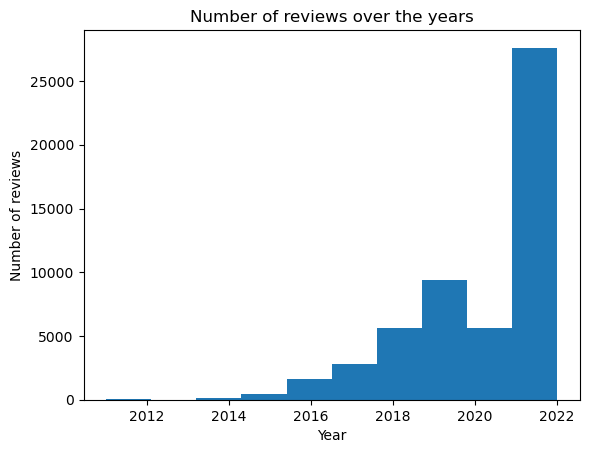

In [27]:
plt.hist(df1['year'])

plt.title("Number of reviews over the years")

plt.xlabel('Year') 
plt.ylabel('Number of reviews') 

plt.savefig('/Users/chenghsuanlin/online_cv_public/assets/pngs/ConViz2.png')


### Write up - 3rd paragraph

The above visualization gives us a cockpit view of the growth of Airbnb over the years. As we can see the growth in the number of reviews is exponencial except the sudden drop around the year 2020. This is probably because of pandemic where the travel industry was severely impacted. However, the number of reviews increased by double around 2022 indicating incredible growth for the company.

# Reference

used code from class: https://uiuc-ischool-dataviz.github.io/is445_oauoag_fall2022/nbv.html?notebook_name=%2Fis445_oauoag_fall2022%2Fweek11%2Fprep_notebook_week11.ipynb

used code from project part 2: https://github.com/shenylin/shenylin.github.io/blob/main/final_project_part2_group26.ipynb